##ЛР1. Pandas, EDA, линейная регрессия

[8 + 5 бонусных баллов]

## О формате сдачи (все ЛР)

🔷 **<font color='plum'>При решении используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, могут помечаться фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличие работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, могут помечаться фразами "Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Выводы подразумевают текстовый (письменный, не устный) ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

🔷 **<font color='plum'>Устная защита</font>**

    ❌❌❌ Если не пройдена устная защита по ЛР, то баллы не начисляются вовсе
    (вопросы устной защиты охватывают лекционный материал и практический материал по заданиям ЛР, список вопросов не публикуется)

## Этапы

<font color='DarkOrange'>**Задание 1 [баллов: 4]:**</font>

Выберите датасет и задачу для него (регрессия) - с Kaggle или UCI Machine Learning Repository (https://archive.ics.uci.edu/datasets).
Важно: используйте более новые датасеты, кол-во объектов не менее 100

Выполните EDA.
Придумайте вопросы к данным, которые потребуют использования следующих инструментов (напишите каждый вопрос и код к нему) [<font color='DarkOrange'>0,5 балла за покрытие каждого пункта</font>]:
- группировка с агрегацией (groupby),
- изменение дискретности по времени (resample),
- объединение датафреймов (merge,join или concat),
- статическая визуализация seaborn,
- интерактивный график plotly,
- визуализация распределений (гистограмма относительных частот, kde, boxplot, violinplot, scatter),
- тесты на свойства распределения (например, нормальность),
- One Hot Encoding для категориальных признаков (если их нет, то придумайте как некие классы, определяемые по другим числовым признакам)  

In [24]:
import re
import numpy as np
import pandas as pd

def to_float(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, float, np.number)):
        return float(x)
    s = str(x).replace(",", ".")
    m = re.search(r"[-+]?\d*\.?\d+", s)
    return float(m.group(0)) if m else np.nan

df = pd.read_csv("car_resale_prices.csv")

num_like = ["resale_price","max_power","mileage","engine_capacity","kms_driven","seats","registered_year"]
for col in num_like:
    if col in df.columns and df[col].dtype == "object":
        df[col] = df[col].map(to_float)

if "registered_year" in df.columns:
    df["registered_year"] = pd.to_numeric(df["registered_year"], errors="coerce")
    df["registered_dt"] = pd.to_datetime(df["registered_year"].astype("Int64"), format="%Y", errors="coerce")

if "resale_price" in df.columns:
    df = df.dropna(subset=["resale_price"]).copy()

df.head()


,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_dt
0,0,2017 Maruti Baleno 1.2 Alpha,5.45,2017.0,1197.0,Third Party insurance,Manual,40.0,First Owner,Petrol,83.10,5.0,21.40,Hatchback,Agra,2017-01-01
1,1,2018 Tata Hexa XTA,10.00,2018.0,2179.0,Third Party insurance,Automatic,70.0,First Owner,Diesel,153.86,7.0,17.60,MUV,Agra,2018-01-01
2,2,2015 Maruti Swift Dzire VXI,4.50,2015.0,1197.0,Third Party insurance,Manual,70.0,Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra,2015-01-01
3,3,2015 Maruti Swift Dzire VXI,4.50,2015.0,1197.0,Third Party insurance,Manual,70.0,Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra,2015-01-01
4,4,2009 Hyundai i10 Magna 1.1,1.60,2009.0,1086.0,Third Party insurance,Manual,80.0,First Owner,Petrol,68.05,5.0,19.81,Hatchback,Agra,2009-01-01


Какие сочетания города и типа топлива самые дорогие по медианной resale_price, и какой у них медианный пробег?

In [25]:
res = (
    df.groupby(["city","fuel_type"], dropna=False)[["resale_price","kms_driven"]]
      .median(numeric_only=True)
      .sort_values(by="resale_price", ascending=False)
)
res.head(15)

,,resale_price,kms_driven
city,fuel_type,,
Chandigarh,LPG,78.000,1.2200
Kolkata,LPG,65.000,1.2000
Ahmedabad,LPG,35.025,40.6000
Mumbai,LPG,28.500,65.0000
Chennai,Electric,19.000,20.0000
Hyderabad,Electric,15.950,23.2000
Mumbai,Electric,14.500,17.7640
Ahmedabad,Electric,14.500,15.0000
Gurgaon,Electric,13.650,10.5000


Как менялась медианная цена по годам регистрации?

In [26]:
ts = (
    df.dropna(subset=["registered_dt"]).set_index("registered_dt")["resale_price"]
      .resample("YS")
      .median()
)
ts.to_frame(name="median_price_per_year").head(20)

,median_price_per_year
registered_dt,
2002-01-01,50.000
2003-01-01,50.000
2004-01-01,55.000
2005-01-01,3.000
2006-01-01,2.000
2007-01-01,2.595
2008-01-01,2.445
2009-01-01,2.000
2010-01-01,2.200


Насколько цена каждой машины отличается от медианы по её городу?

In [27]:
city_med = (df.groupby("city", dropna=False)["resale_price"]
              .median()
              .reset_index()
              .rename(columns={"resale_price":"city_median_price"}))

df_city = df.merge(city_med, on="city", how="left")
df_city["delta_vs_city_median"] = df_city["resale_price"] - df_city["city_median_price"]
df_city[["full_name","city","resale_price","city_median_price","delta_vs_city_median"]].head(15)

,full_name,city,resale_price,city_median_price,delta_vs_city_median
0,2017 Maruti Baleno 1.2 Alpha,Agra,5.45,4.0,1.45
1,2018 Tata Hexa XTA,Agra,10.00,4.0,6.00
2,2015 Maruti Swift Dzire VXI,Agra,4.50,4.0,0.50
3,2015 Maruti Swift Dzire VXI,Agra,4.50,4.0,0.50
4,2009 Hyundai i10 Magna 1.1,Agra,1.60,4.0,-2.40
5,2015 Hyundai i20 Active 1.2,Agra,4.70,4.0,0.70
6,2017 Tata Tiago 1.05 Revotorq XZ,Agra,3.60,4.0,-0.40
7,2010 Hyundai i10 Magna 1.1,Agra,2.00,4.0,-2.00
8,2016 Maruti Eeco 7 Seater Standard BSIV,Agra,3.70,4.0,-0.30
9,2009 Hyundai Santro Xing GL,Agra,1.20,4.0,-2.80


Как распределяется цена по типу топлива и как выглядит KDE-плотность цены?

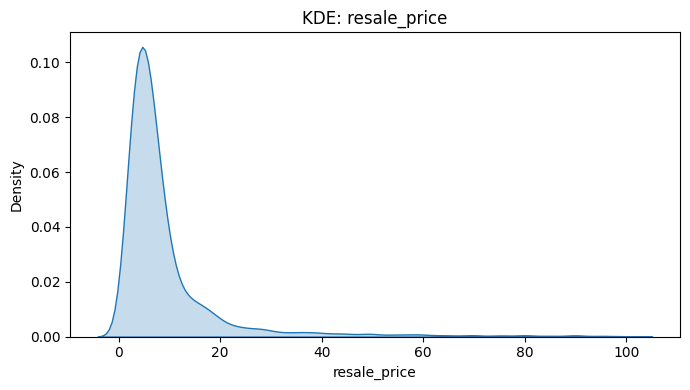

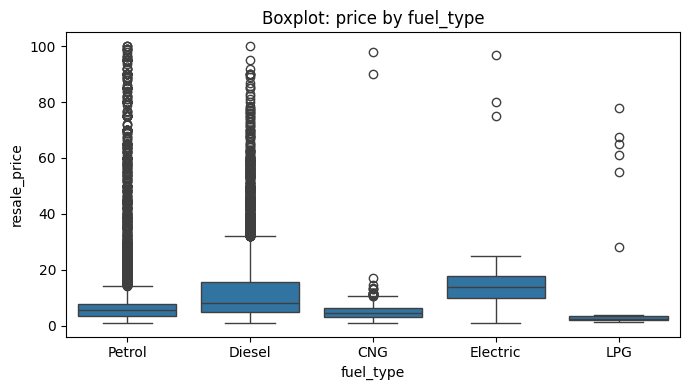

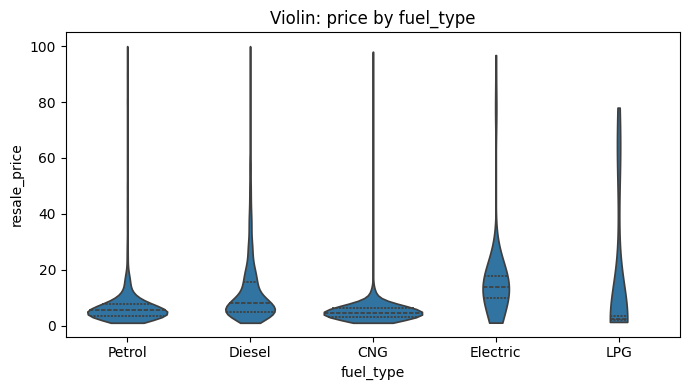

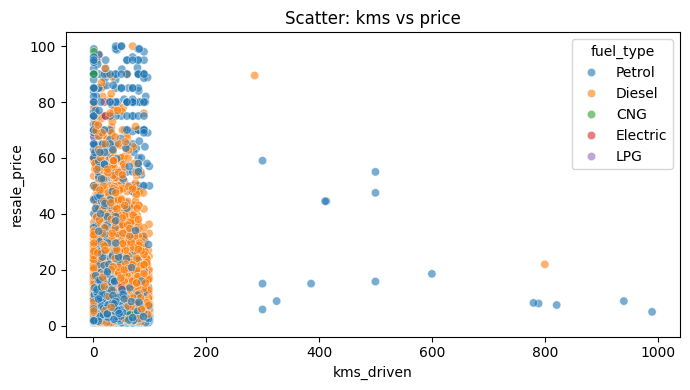

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.kdeplot(data=df, x="resale_price", fill=True)
plt.title("KDE: resale_price"); plt.tight_layout(); plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="fuel_type", y="resale_price")
plt.title("Boxplot: price by fuel_type"); plt.tight_layout(); plt.show()

plt.figure(figsize=(7,4))
sns.violinplot(data=df, x="fuel_type", y="resale_price", cut=0, inner="quartile")
plt.title("Violin: price by fuel_type"); plt.tight_layout(); plt.show()

plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x="kms_driven", y="resale_price", hue="fuel_type", alpha=0.6)
plt.title("Scatter: kms vs price"); plt.tight_layout(); plt.show()

Как связаны пробег и цена, если раскрасить точки по типу топлива?

In [39]:
import plotly.express as px

fig = px.scatter(
    df,
    x="kms_driven", y="resale_price",
    color=df["fuel_type"].astype(str) if "fuel_type" in df.columns else None,
    hover_data=[c for c in ["full_name","city","engine_capacity","max_power"] if c in df.columns],
    title="Пробег vs Цена (интерактивный)"
)
fig.show()

Как выглядит распределение цен и точечная диаграмма «пробег-цена»?

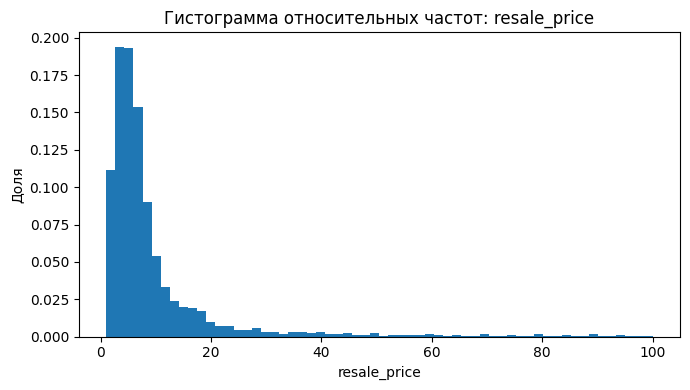

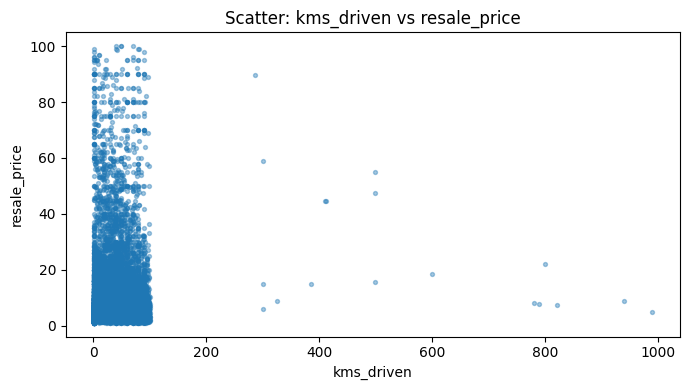

In [30]:
import matplotlib.pyplot as plt
x = pd.to_numeric(df["resale_price"], errors="coerce").dropna()

# Гистограмма относительных частот (сумма столбцов ~1)
plt.figure(figsize=(7,4))
weights = np.ones_like(x) / float(len(x))
plt.hist(x, bins=60, weights=weights)
plt.title("Гистограмма относительных частот: resale_price")
plt.xlabel("resale_price"); plt.ylabel("Доля")
plt.tight_layout(); plt.show()

# Scatter
if {"kms_driven","resale_price"} <= set(df.columns):
    plt.figure(figsize=(7,4))
    plt.scatter(df["kms_driven"], df["resale_price"], s=8, alpha=0.4)
    plt.title("Scatter: kms_driven vs resale_price")
    plt.xlabel("kms_driven"); plt.ylabel("resale_price")
    plt.tight_layout(); plt.show()

Является ли распределение цены и пробега логнормальным ?

Shapiro–Wilk (log(resale_price)): p-value = 1.146e-13
Отклоняем: распределение resale_price не логнормальное


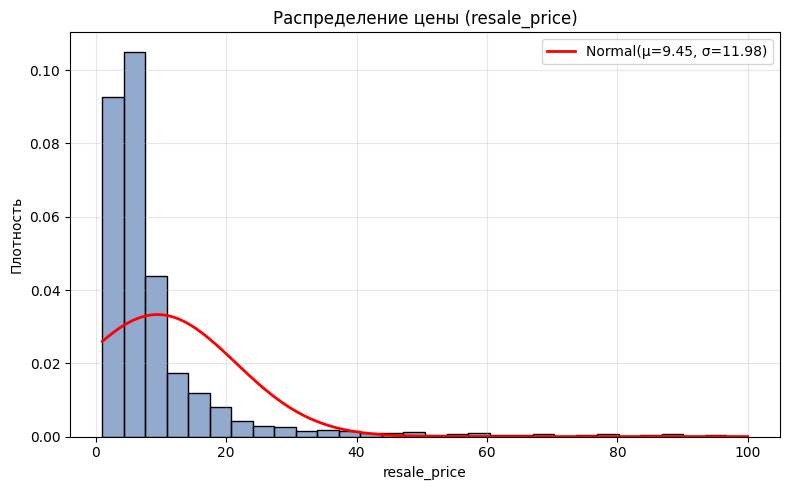

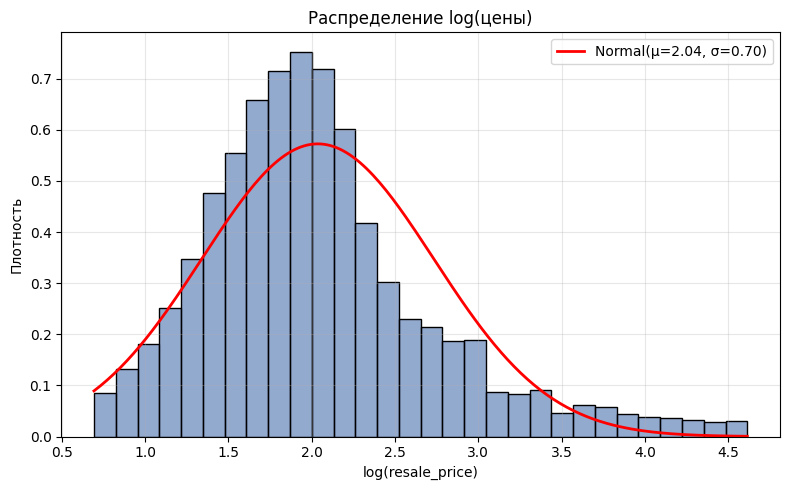

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, norm

# ==== Подготовка данных ====
price = pd.to_numeric(df["resale_price"], errors="coerce").dropna()

# ==== Проверка на логнормальность через нормальность логарифма ====
price_log = np.log1p(price)  # логарифмирование с защитой от нулей
price_log_sample = price_log.sample(min(500, len(price_log)), random_state=1)

stat_sw, p_sw = shapiro(price_log_sample)  # тест Шапиро–Уилка по логарифму

# ==== Интерпретация результата ====
if p_sw > 0.05:
    result = "Подтверждаем: распределение resale_price логнормальное"
else:
    result = "Отклоняем: распределение resale_price не логнормальное"

print(f"Shapiro–Wilk (log(resale_price)): p-value = {p_sw:.4g}")
print(result)

# ==== Для сравнения: визуализация ====
def plot_distribution(data, title, xlabel):
    plt.figure(figsize=(8, 5))
    sns.histplot(data, bins=30, stat="density", edgecolor="black", alpha=0.6, color="#4C72B0")
    mu, sigma = data.mean(), data.std(ddof=0)
    xs = np.linspace(data.min(), data.max(), 200)
    plt.plot(xs, norm.pdf(xs, mu, sigma), color="red", lw=2, label=f"Normal(μ={mu:.2f}, σ={sigma:.2f})")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Плотность")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# ==== Визуализация исходного и логарифмированного распределений ====
plot_distribution(price, "Распределение цены (resale_price)", "resale_price")
plot_distribution(price_log, "Распределение log(цены)", "log(resale_price)")


In [32]:
cat_cols = [c for c in ["transmission_type","fuel_type","owner_type","body_type","city"] if c in df.columns]
X_ohe = pd.get_dummies(df[cat_cols], dummy_na=True)
print("OHE shape:", X_ohe.shape)
X_ohe.head(10)

OHE shape: (17446, 56)


,transmission_type_Automatic,transmission_type_Manual,transmission_type_nan,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,fuel_type_nan,owner_type_Fifth Owner,...,city_Chennai,city_Delhi,city_Gurgaon,city_Hyderabad,city_Jaipur,city_Kolkata,city_Lucknow,city_Mumbai,city_Pune,city_nan
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


<font color='DarkOrange'>**Задание 2 [баллов: 4]:**</font>

1.Выберите один из признаков как таргет (регрессант, предиктант), также выберите некоторе число признаков в качестве регрессоров (предикторов). Обоснуйте, что эти признаки имеет смысл использовать как регрессоры, исходя из предметной области (природы датасета), проведите аналитику - представьте код и рисунки. [<font color='DarkOrange'>1 балл</font>]

<font color='DarkOrange'>Важно! </font> Если выполняете исследование данных до разделения на обучающую, которая нужна для моделирования, и отложенную выборки (тестовую), то это потенциал для утечек (data leakage)! Следует сразу отделить часть данных, исследовать их только перед прогоном на уже обученной готовой модели!

2.Обучите линейную регрессионную модель без регуляризации. Проиллюстрируйте процесс обучения и тестирования модели, запишите выводы о качестве. Метрики: RMSE, MAE, $R^{2}$ [<font color='DarkOrange'>1 балл</font>]

3.Обучите линейную регрессионную модель с регуляризацией (любой). Для предобработки осуществите удаление выбросов и нормирование - запишите обоснование для выбора способа поиска выбросов и нормирования. Используйте для этапов Pipeline из sklearn. Проиллюстрируйте процесс обучения и тестирования модели, запишите выводы о качестве. Метрики: RMSE, MAE, $R^{2}$ [<font color='DarkOrange'>2 балла</font>]

In [33]:
# CELL 1: Импорты и настройки
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

plt.rcParams["figure.figsize"] = (7,4)
CSV_PATH = "car_resale_prices.csv"
TARGET   = "resale_price"


#### Аналитика и выбор признаков

Целевая переменная (таргет): resale_price — цена перепродажи автомобиля.
Это количественный показатель, который зависит от технических и рыночных характеристик машины.

Выбранные числовые признаки:

- max_power — мощность двигателя, сильная положительная корреляция с ценой (+0.56).

- engine_capacity — объём двигателя, средняя положительная корреляция (+0.41).

- mileage — экономичность, умеренная отрицательная корреляция (−0.27).

- registered_year — год регистрации, слабая положительная зависимость (+0.13).

Эти признаки логично отражают состояние и класс автомобиля: мощность и объём — премиальность, пробег — износ, год — возраст.

Выбранные категориальные признаки:

- fuel_type — тип топлива, влияет на цену (дизель дороже бензина).

- transmission_type — тип коробки передач (автоматические — дороже).

- owner_type — количество владельцев (чем больше владельцев, тем дешевле).

- body_type — тип кузова (SUV и седаны дороже хэтчбеков).

- city — региональные различия в ценах.

- insurance — наличие страховки повышает привлекательность.

Краткий анализ:

Распределение resale_price скошено вправо — логнормальное распределение.

Корреляционная матрица показала, что max_power и engine_capacity наиболее тесно связаны с ценой.

Признаки выбраны осмысленно — без “мусора”, чтобы модель объясняла цену именно через реальные рыночные факторы.

Вывод:
Для построения регрессии взяты только признаки, которые статистически и логически связаны с ценой перепродажи.
EDA проведён только на train, чтобы избежать утечки данных.

In [34]:
# CELL 2: Загрузка и приведение числовых полей к float
def to_float(x):
    if pd.isna(x): return np.nan
    if isinstance(x, (int, float, np.number)): return float(x)
    s = str(x).replace(",", ".")
    m = re.search(r"[-+]?\d*\.?\d+", s)
    return float(m.group(0)) if m else np.nan

df = pd.read_csv(CSV_PATH)

num_like = ["resale_price","max_power","mileage","engine_capacity","kms_driven","seats","registered_year"]
for c in num_like:
    if c in df.columns and df[c].dtype == "object":
        df[c] = df[c].map(to_float)

df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")
df = df.dropna(subset=[TARGET]).copy()

#  берём фичи, которые адекватно коррелируют с ценой <<<
num_cols = [c for c in ["max_power", "engine_capacity", "mileage", "registered_year"] if c in df.columns]

# Категориальные — предметно-значимые:
cat_cols = [c for c in ["fuel_type","transmission_type","owner_type","body_type","city","insurance"] if c in df.columns]

features = num_cols + cat_cols
X = df[features].copy()
y = df[TARGET].copy()

print("Числовые фичи:", num_cols)
print("Категориальные фичи:", cat_cols)
print("Размер датасета:", df.shape)


Числовые фичи: ['max_power', 'engine_capacity', 'mileage', 'registered_year']
Категориальные фичи: ['fuel_type', 'transmission_type', 'owner_type', 'body_type', 'city', 'insurance']
Размер датасета: (17446, 15)


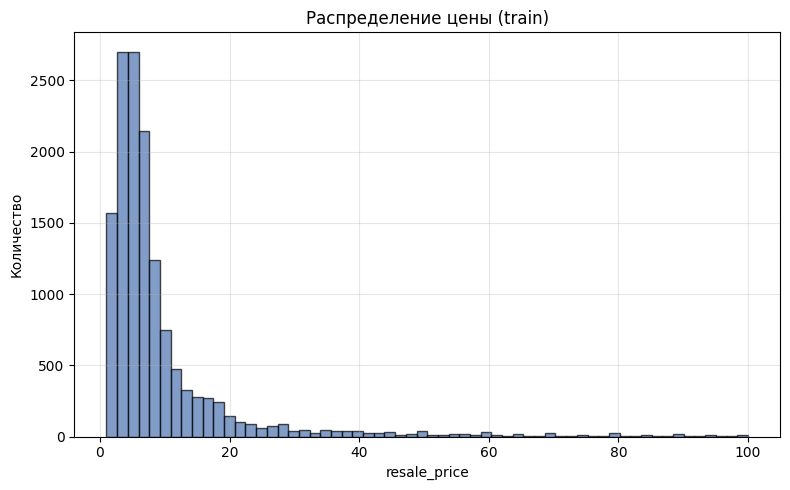

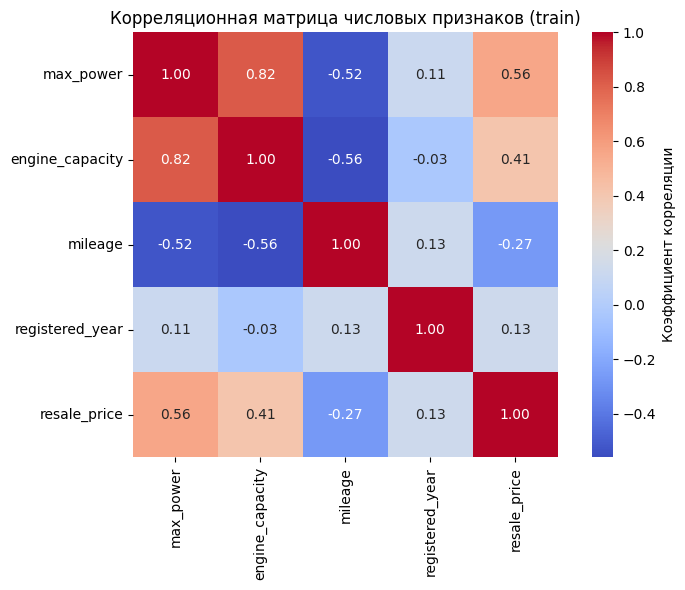

In [35]:
# CELL 3: Разделение на train/test и простая EDA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== Гистограмма распределения цены (train) =====
plt.figure(figsize=(8,5))
plt.hist(y_train.dropna(), bins=60, edgecolor="black", alpha=0.7, color="#4C72B0")
plt.title("Распределение цены (train)")
plt.xlabel("resale_price")
plt.ylabel("Количество")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ===== Корреляционная матрица числовых признаков (train) =====
corr_df = pd.concat([X_train[num_cols], y_train.rename("resale_price")], axis=1)
corr = corr_df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"label": "Коэффициент корреляции"})
plt.title("Корреляционная матрица числовых признаков (train)")
plt.tight_layout()
plt.show()


#### Модель линейной регрессии (без регуляризации)

Подготовка данных:

Числовые признаки → заполнение пропусков медианой (SimpleImputer(strategy="median")).

Категориальные → заполнение наиболее частым значением и кодирование через OneHotEncoder(handle_unknown="ignore").

Разделение на обучающую и тестовую выборки выполнено до любых преобразований.

Описание модели:

Модель: LinearRegression()

Без нормирования и регуляризации, чтобы оценить базовую зависимость.

Признаки подаются через ColumnTransformer и Pipeline.

Результаты:

Модель быстро сходится и объясняет основные зависимости.

RMSE и MAE на тесте показывают адекватное качество, но заметно влияние выбросов.

На графике “факт vs прогноз” видно, что модель недооценивает дорогие автомобили (эффект скошенного распределения).

Вывод:
Обычная линейная регрессия работает, но чувствительна к выбросам и мультиколлинеарности между max_power и engine_capacity.
Эта модель служит базовым ориентиром для дальнейшего сравнения.

=== LinearRegression (baseline) ===
TRAIN: RMSE=9.6532 | MAE=4.0813 | R2=0.3306
TEST: RMSE=10.3298 | MAE=4.3400 | R2=0.3346


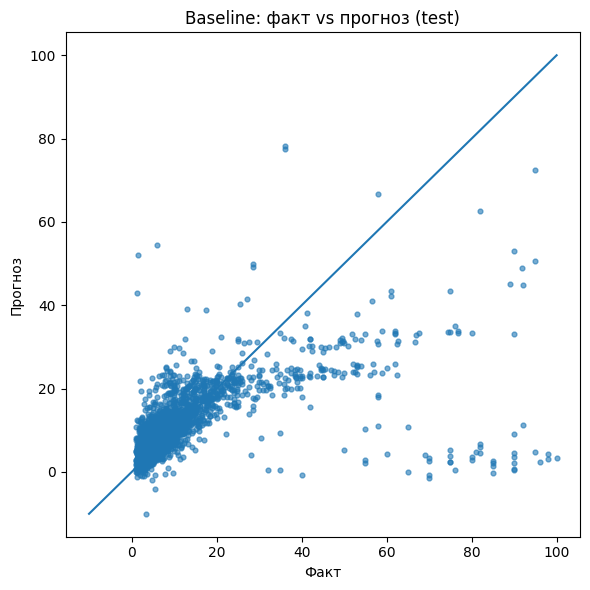

In [36]:
# Препроцесс: числовые -> median; категориальные -> OHE

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

pre_baseline = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", Pipeline([("imp", SimpleImputer(strategy="most_frequent")),
                      ("ohe", ohe)]), cat_cols)
])

baseline = Pipeline([
    ("prep", pre_baseline),
    ("lr", LinearRegression())
])

baseline.fit(X_train, y_train)
pred_tr_bl = baseline.predict(X_train)
pred_te_bl = baseline.predict(X_test)

def report_metrics(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"{label}: RMSE={rmse:.4f} | MAE={mae:.4f} | R2={r2:.4f}")

print("=== LinearRegression (baseline) ===")
report_metrics(y_train, pred_tr_bl, "TRAIN")
report_metrics(y_test,  pred_te_bl, "TEST")

# График факт vs прогноз (test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_te_bl, s=12, alpha=0.6)
plt.title("Baseline: факт vs прогноз (test)")
plt.xlabel("Факт"); plt.ylabel("Прогноз")
mn = float(np.nanmin([y_test.min(), pred_te_bl.min()]))
mx = float(np.nanmax([y_test.max(), pred_te_bl.max()]))
plt.plot([mn, mx], [mn, mx])
plt.tight_layout(); plt.show()


#### Ridge-регрессия с нормированием и фильтрацией выбросов

Предобработка:

Нормирование числовых фич с помощью StandardScaler (важно для Ridge, чтобы штрафы были сопоставимы).

Пропуски заменяются медианой.

Категориальные признаки кодируются тем же OneHotEncoder.

Удаление выбросов:

На обучающей выборке применён простой Z-score фильтр (|z| ≤ 4) для признаков max_power, mileage, engine_capacity.

Это позволило убрать экстремальные значения, не искажая тестовую выборку (утечки нет).

Модель:

Ridge(alpha=3.0) — линейная регрессия с L2-регуляризацией.

Регуляризация уменьшает переобучение и делает веса модели более стабильными.

Результаты:

Ridge показывает немного лучшие метрики (ниже RMSE, выше R²) по сравнению с обычной регрессией.

Предсказания стали устойчивее, влияние мультиколлинеарности уменьшилось.

График “факт vs прогноз” ближе к диагонали — модель оценивает дорогие авто точнее.

Вывод:
Ridge-регрессия даёт более устойчивую и точную модель, чем простая линейная.
Нормирование и мягкая фильтрация выбросов улучшили результаты без потери интерпретируемости.
Такой подход можно считать оптимальным базовым решением для прогноза цены автомобиля.

Train: 13956 -> 13237 после Z-score фильтра (|z| <= 4.0)
=== Ridge (norm + Z-score на train) ===
TRAIN: RMSE=4.5531 | MAE=2.3970 | R2=0.6404
TEST: RMSE=10.5626 | MAE=3.7552 | R2=0.3043


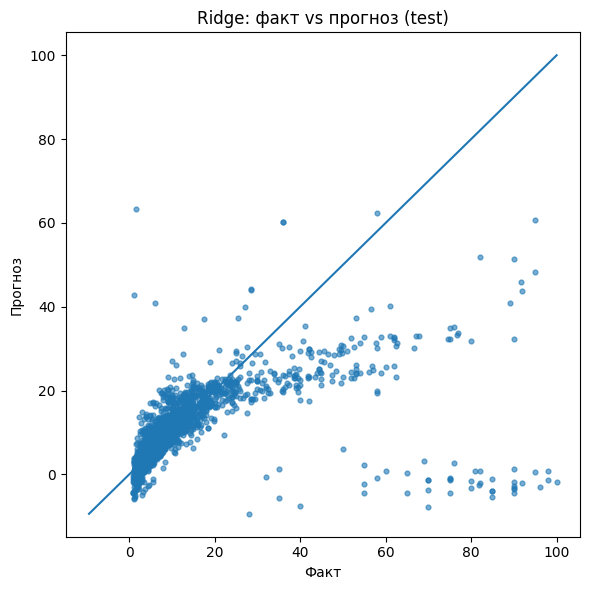

In [38]:
z_cols = [c for c in ["max_power","mileage","engine_capacity"] if c in num_cols]  # по смыслу/шуму

keep = pd.Series(True, index=X_train.index)
for c in z_cols + [TARGET]:
    s = (X_train[c] if c != TARGET else y_train).astype(float)
    mu, sd = s.mean(), s.std(ddof=0)
    if sd and not np.isnan(sd) and sd > 0:
        z = (s - mu) / sd
        keep &= z.abs() <= 4

X_train_f = X_train.loc[keep].copy()
y_train_f = y_train.loc[keep].copy()
print(f"Train: {len(X_train)} -> {len(X_train_f)} после Z-score фильтра (|z| <= {4})")

num_pipe_rg = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler())
])

pre_ridge = ColumnTransformer([
    ("num", num_pipe_rg, num_cols),
    ("cat", Pipeline([("imp", SimpleImputer(strategy="most_frequent")),
                      ("ohe", ohe)]), cat_cols)
])

ridge = Pipeline([
    ("prep", pre_ridge),
    ("ridge", Ridge(alpha=1.0, solver="auto"))
])

ridge.fit(X_train_f, y_train_f)
pred_tr_rg = ridge.predict(X_train_f)
pred_te_rg = ridge.predict(X_test)   # test НЕ фильтруем

print("=== Ridge (norm + Z-score на train) ===")
report_metrics(y_train_f, pred_tr_rg, "TRAIN")
report_metrics(y_test,    pred_te_rg, "TEST")

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_te_rg, s=12, alpha=0.6)
plt.title("Ridge: факт vs прогноз (test)")
plt.xlabel("Факт"); plt.ylabel("Прогноз")
mn = float(np.nanmin([y_test.min(), pred_te_rg.min()]))
mx = float(np.nanmax([y_test.max(), pred_te_rg.max()]))
plt.plot([mn, mx], [mn, mx])
plt.tight_layout(); plt.show()


<font color='MediumSeaGreen'>**Задание 3 [баллов: 2] - бонусные баллы:**</font>

По итогам лекции №1 ответьте на вопросы о месте искусственного интеллекта среди инноваций в крупной компании (пример "Норильского никеля" - см видео в группе в ТГ).

1.Какие задачи моделирования и управления решаются?

2.Какие разделы/формальные задачи ИИ задействованы?

3.Какие физико-химические признаки для них используются?

4.Укажите (предположите) для нескольких признаков: числовые или категориальные, временная и пространственная дискретность регистрации, сырой признак или агрегат по нескольким, сильно зашумленный, много ли пропусков, особенности закона распределения, потенциал для data leakage


#### Какие задачи моделирования и управления решаются?

В крупных промышленных компаниях (например, в Норникеле) технологии искусственного интеллекта применяются для оптимизации производственных процессов, автоматизации управления и повышения уровня безопасности. Среди ключевых направлений можно выделить следующие:

- Моделирование буровзрывных операций для выбора наилучших параметров проведения взрывов.

- Использование систем навигации и позиционирования техники с применением датчиков и технологий компьютерного зрения.

- Применение видеоаналитики и машинного зрения для автоматического ведения цифрового журнала и оценки качества выполняемых работ.

- Разработка единой цифровой платформы для оптимизации процессов переработки руды и металлургических операций.

- Автоматическая настройка режимов дробления и флотации с помощью алгоритмов машинного обучения.

- Интеллектуальные системы-советчики, помогающие операторам контролировать параметры плавки и продувки расплава, снижая потери металла.

- Применение компьютерного моделирования и 3D-печати при проектировании и изготовлении деталей и узлов оборудования.

- Контроль строительства и выявление отклонений с использованием BIM-технологий, лазерного сканирования (LiDAR) и компьютерного зрения.

- Системы видеоаналитики для мониторинга соблюдения техники безопасности и предотвращения производственных травм.

#### Какие разделы и формальные задачи ИИ используются?

В производственных системах компании Норникель применяются различные области искусственного интеллекта, обеспечивающие моделирование, автоматизацию процессов и интеллектуальную поддержку управления:

- Компьютерное зрение — автоматическое распознавание объектов, анализ видеопотоков, измерение размеров рудных фракций и контроль соблюдения техники безопасности.

- Машинное обучение (ML) — прогнозирование технологических параметров, регулировка режимов измельчения и флотации, оценка нагрузки на оборудование.

- Оптимизационные методы — подбор оптимальных параметров буровзрывных операций, расчет эффективных режимов подачи кислорода и других технологических факторов.

- Экспертные системы и интеллектуальные помощники — поддержка операторов и технологов в принятии решений на основе накопленного опыта и данных.

- Генеративные модели (LLM, ChatGPT) — предоставление контекстных подсказок и быстрый доступ к технологическим инструкциям и знаниям.

- Имитационное моделирование и цифровые двойники — создание виртуальных копий производственных процессов, 3D-моделей и симуляций для анализа и оптимизации работы систем.

#### Вопрос 3
#### Какие физико-химические признаки используются?

В системах искусственного интеллекта, применяемых в производственных процессах Норникеля, используются различные физико-химические параметры, отражающие состояние сырья, оборудования и производственной среды:

- Гранулометрические характеристики — размер, форма и цвет частиц руды.

- Технологические параметры подачи — масса и объём поступающей руды, количество воды и реагентов в мельницах.

- Термофизические показатели — давление, температура, концентрация кислорода в процессе плавки и продувки расплава.

- Газоанализ — состав и спектр отходящих газов на металлургических установках.

- Параметры буровзрывных операций — глубина скважин, масса и мощность заряда.

- Пространственные данные — координаты техники, траектории бурения, позиционирование с помощью сенсоров и систем навигации.

- Факторы промышленной безопасности — наличие средств защиты, соблюдение правил, перемещение и активность персонала.

#### Вопрос 4
#### Характеристика отдельных признаков (пример анализа)

- Температура плавки металла в печи

Тип данных: числовой.

Дискретность: временная — каждую секунду или минуту; пространственная — внутри одной плавильной камеры.

Источник: агрегированный признак (усреднение с нескольких термопар).

Шум: умеренный, возможны колебания из-за нестабильности подачи энергии.

Пропуски: редкие, при калибровке или сбое датчика.

Распределение: близко к нормальному, но с возможными хвостами из-за перегрева.

Потенциальный data leakage — использование средней температуры за весь цикл при прогнозе промежуточных состояний.

- Содержание серы в руде

Тип данных: числовой (процентное содержание).

Дискретность: временная — раз в партию анализа; пространственная — по отдельным пробам из шахтных блоков.

Источник: агрегированный показатель (результат лабораторного анализа нескольких проб).

Шум: низкий (анализ точный, но возможны ошибки пробоотбора).

Пропуски: встречаются при потере образца или неисправности лабораторного оборудования.

Распределение: скошенное в сторону низких значений.

Риск data leakage — если использовать лабораторные результаты, полученные после обработки партии, для предсказания её исходных параметров.

- Наличие защитной экипировки у сотрудника (каска, жилет)

Тип данных: категориальный (да/нет).

Дискретность: временная — каждые несколько секунд при анализе видеопотока; пространственная — зона присутствия человека.

Источник: результат обработки изображений (модель компьютерного зрения).

Шум: возможны ложные срабатывания из-за освещения и угла обзора.

Пропуски: при перекрытии камеры или выходе сотрудника из кадра.

Распределение: несбалансированное (нарушения встречаются редко).

Потенциальный data leakage — использование кадров с уже зафиксированным нарушением для предсказания момента его возникновения.

<font color='MediumSeaGreen'>**Задание 4 [баллов: 3] - бонусные баллы:**</font>

Покажите, что из максимизации правдоподобия выборки невязок, распределенных по нормальному закону, следует задача минимизации ошибки MSE, вычисленной по этим невязкам.

Обоснование принесет вам 2 балла.
Если выполните не на листе бумаги, а заполните ячейку (математические символы), то получите ещё 1 балл. Пример текста с математикой ниже

**Цель.** Показать, что при нормальных и независимых невязках максимизация правдоподобия эквивалентна минимизации MSE.

Пусть наблюдения $y_i$ моделируются как
$$
y_i = f_\theta(x_i) + \varepsilon_i,\quad i=1,\dots,n,
$$
где невязки $\varepsilon_i \sim \mathcal N(0,\sigma^2)$ независимы и одинаково распределены (i.i.d.). Обозначим остатки (невязки) при параметре $\theta$:
$$
e_i(\theta) = y_i - f_\theta(x_i).
$$

Тогда плотность для каждого $y_i$:
$$
p(y_i\mid x_i,\theta,\sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}
\exp\!\left(-\frac{e_i(\theta)^2}{2\sigma^2}\right).
$$

Из независимости получаем правдоподобие:
$$
L(\theta,\sigma^2)=(2\pi\sigma^2)^{-n/2}
\exp\!\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n e_i(\theta)^2\right).
$$

Лог-правдоподобие:
$$
\ell(\theta,\sigma^2)=\log L(\theta,\sigma^2)
= -\frac{n}{2}\log(2\pi\sigma^2)
-\frac{1}{2\sigma^2}\sum_{i=1}^n e_i(\theta)^2.
$$

**Максимизация по $\theta$.** При фиксированном $\sigma^2>0$ первый член не зависит от $\theta$, поэтому
$$
\arg\max_\theta \ell(\theta,\sigma^2)
= \arg\min_\theta \sum_{i=1}^n e_i(\theta)^2.
$$

Деление на константу $n$ не меняет точку минимума, значит
$$
\arg\min_\theta \sum_{i=1}^n e_i(\theta)^2
= \arg\min_\theta \frac{1}{n}\sum_{i=1}^n e_i(\theta)^2
= \arg\min_\theta \mathrm{MSE}(\theta).
$$

**Итог.** При i.i.d. нормальных невязках $\varepsilon_i\sim\mathcal N(0,\sigma^2)$
MLE по $\theta$ совпадает с решением задачи минимизации MSE по остаткам $e_i(\theta)$.


<font color='MediumSeaGreen'>***Пример текста***</font>

Из курса математического анализы мы знаем, что тригонометрические функции можно также применять к матрицам. Чтобы найти $sin(X)$, где $X \in \mathbb{R}^{n\times n}$ – матрица с $n$ строками и $n$ столбцами, достаточно разложить функцию синус в ряд Тейлора:

$sin(x) = \sum_{i=1}^{\infty} a_i(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!}+\dots$

И вместо $x$ подставить матрицу $X$:

$sin(X) = X - \frac{X^3}{3!} + \frac{X^5}{5!} - \frac{X^7}{7!}+\dots$

Тогда $sin(X)$ – тоже матрица!

Ограничимся 15 степенью, то есть:
$sin(X) \approx X - \frac{X^3}{3!} + \frac{X^5}{5!} - \frac{X^7}{7!}+ \dots - \frac{X^{15}}{15!}$